In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
 data = pd.read_csv('/content/creditcard.csv')



In [ ]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
data.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [ ]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,160580.000000,160580.000000,160580.000000,160580.000000,160580.000000,160580.000000,160580.000000,160580.000000,160580.000000,160580.000000,...,160579.000000,160579.000000,160579.000000,160579.000000,160579.000000,160579.000000,160579.000000,160579.000000,160579.000000,160579.000000
mean,57480.545242,-0.207315,0.051732,0.565654,0.137480,-0.208785,0.065082,-0.094873,0.041622,0.021107,...,-0.035850,-0.100085,-0.026058,0.010271,0.106234,0.014743,0.001845,0.002501,87.343062,0.002217
std,24648.739896,1.845212,1.615910,1.355699,1.360672,1.333667,1.291085,1.210891,1.239136,1.161060,...,0.745918,0.655277,0.585846,0.596814,0.455527,0.493072,0.392889,0.310177,245.159473,0.047033
min,0.000000,-56.407510,-72.715728,-33.680984,-5.519697,-42.147898,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-11.710896,0.000000,0.000000
25%,40115.750000,-1.005531,-0.528291,0.039585,-0.718119,-0.851388,-0.681213,-0.592292,-0.153410,-0.662940,...,-0.231759,-0.549532,-0.171314,-0.328744,-0.173936,-0.330606,-0.064278,-0.016428,5.450000,0.000000
50%,58415.500000,-0.232236,0.120630,0.675769,0.147207,-0.253136,-0.194186,-0.041671,0.064074,-0.083914,...,-0.059066,-0.079427,-0.039814,0.062089,0.149179,-0.060187,0.009761,0.022106,21.500000,0.000000
75%,75826.250000,1.173304,0.811237,1.326370,0.960994,0.329968,0.452844,0.446030,0.359376,0.651366,...,0.117804,0.337116,0.092439,0.413072,0.406889,0.279121,0.089580,0.078114,76.710000,0.000000
max,113472.000000,2.439207,22.057729,9.382558,16.875344,34.801666,22.529298,36.677268,20.007208,15.594995,...,27.202839,10.503090,19.002942,4.022866,7.519589,3.517346,12.152401,33.847808,19656.530000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160580 entries, 0 to 160579
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    160580 non-null  float64
 1   V1      160580 non-null  float64
 2   V2      160580 non-null  float64
 3   V3      160580 non-null  float64
 4   V4      160580 non-null  float64
 5   V5      160580 non-null  float64
 6   V6      160580 non-null  float64
 7   V7      160580 non-null  float64
 8   V8      160580 non-null  float64
 9   V9      160580 non-null  float64
 10  V10     160579 non-null  float64
 11  V11     160579 non-null  float64
 12  V12     160579 non-null  float64
 13  V13     160579 non-null  float64
 14  V14     160579 non-null  float64
 15  V15     160579 non-null  float64
 16  V16     160579 non-null  float64
 17  V17     160579 non-null  float64
 18  V18     160579 non-null  float64
 19  V19     160579 non-null  float64
 20  V20     160579 non-null  float64
 21  V21     16

In [ ]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# Visualize using graphs figures etc

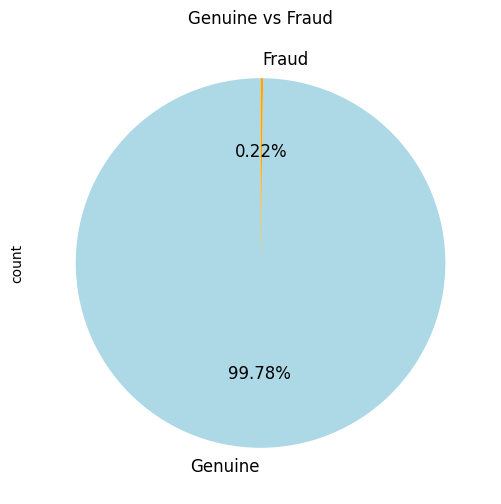

In [ ]:
plt.figure(figsize=(10,6))
data['Class'].value_counts().plot(kind='pie',autopct='%1.2f%%',colors=['lightblue','orange'],labels=['Genuine','Fraud'],startangle=90,fontsize=12)
plt.title('Genuine vs Fraud')
plt.show()




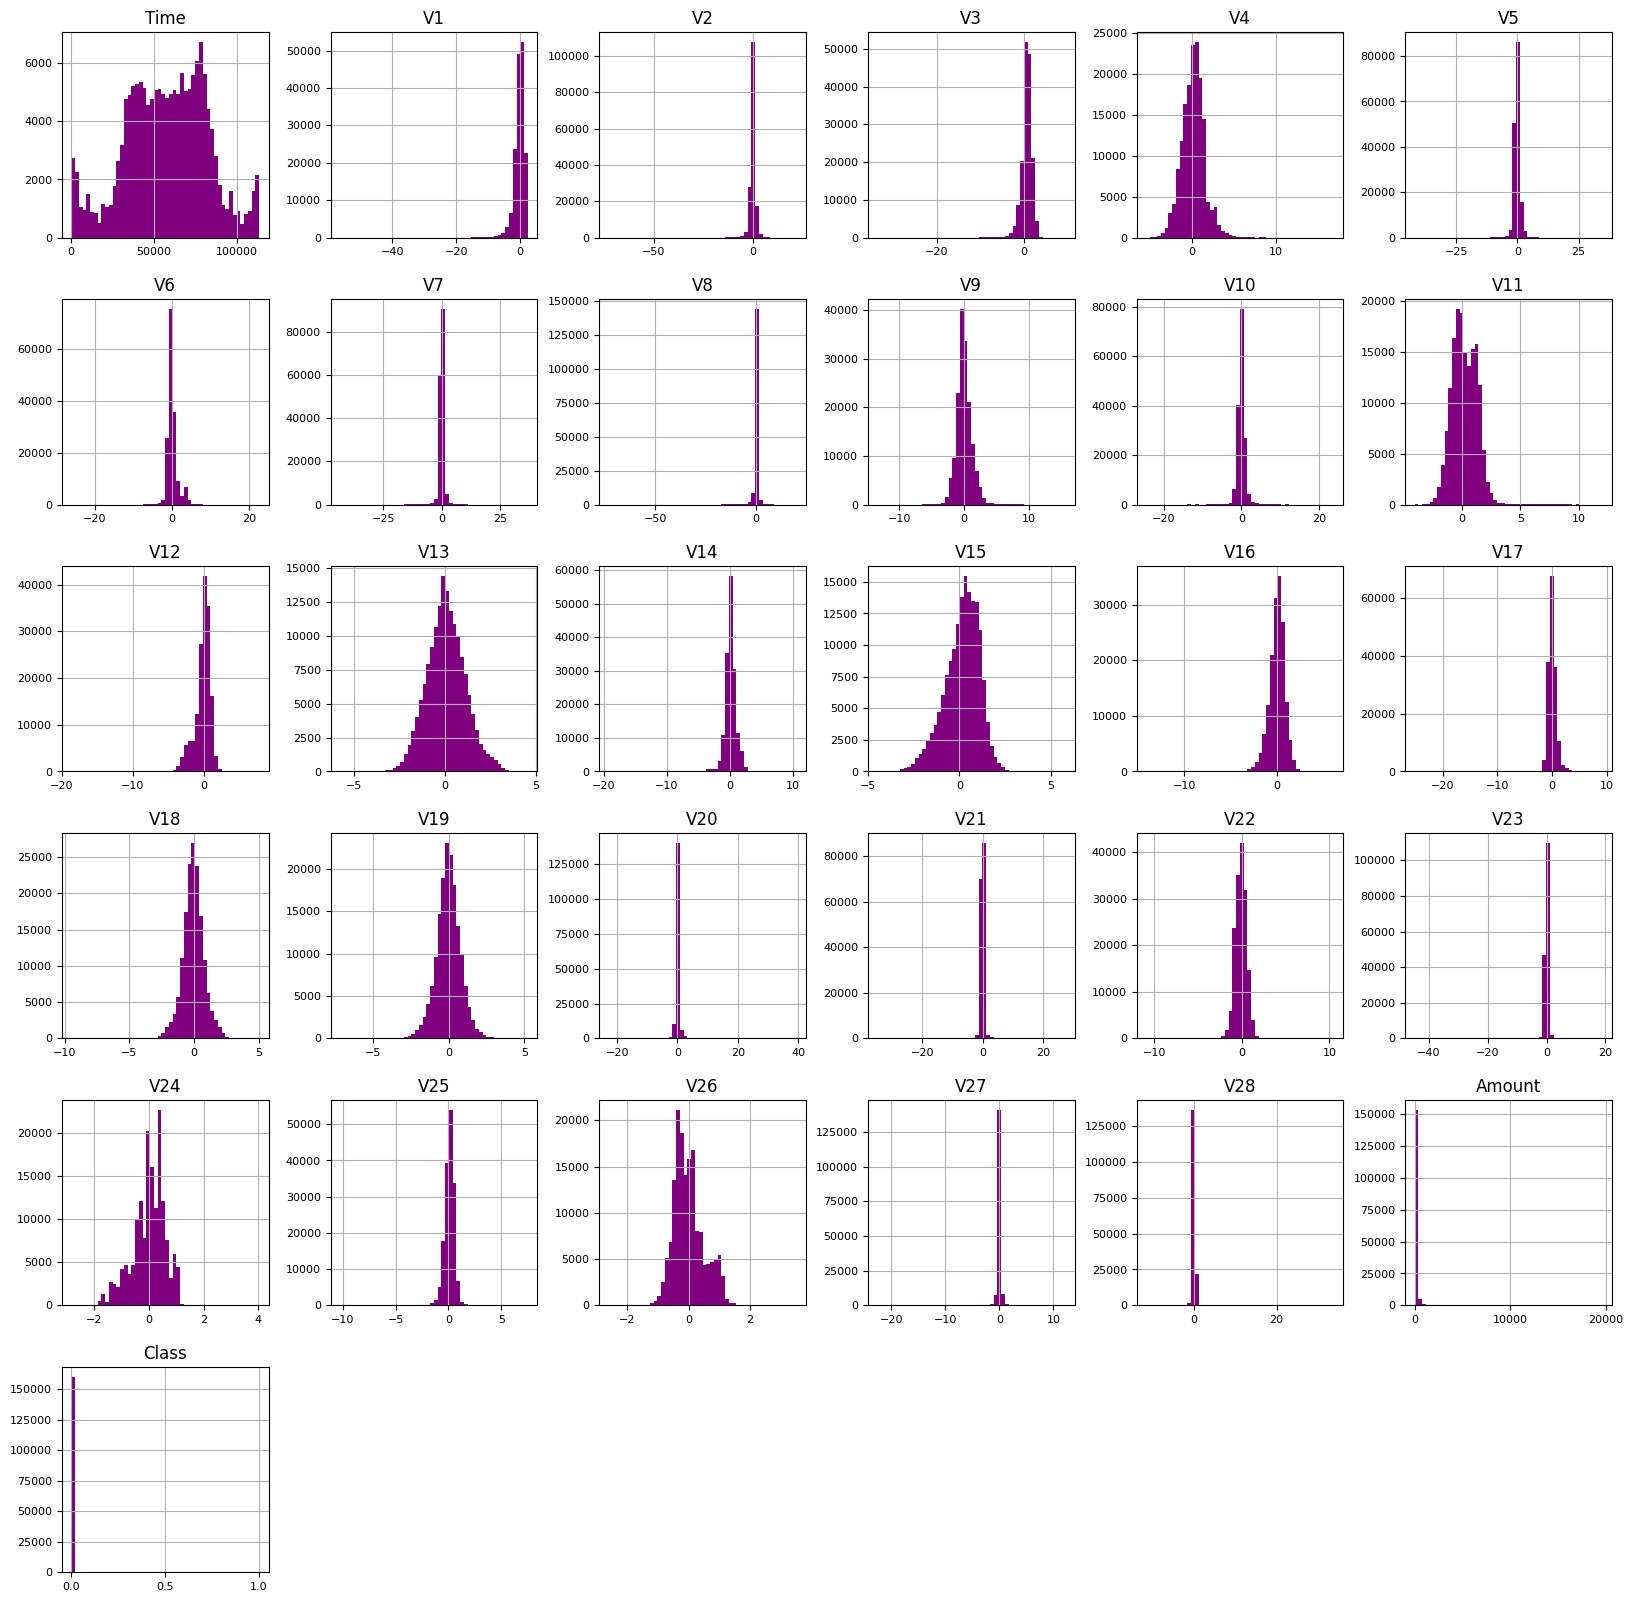

In [ ]:
data.hist(figsize=(20,20),bins=50,xlabelsize=8,ylabelsize=8,color='purple')
plt.show()

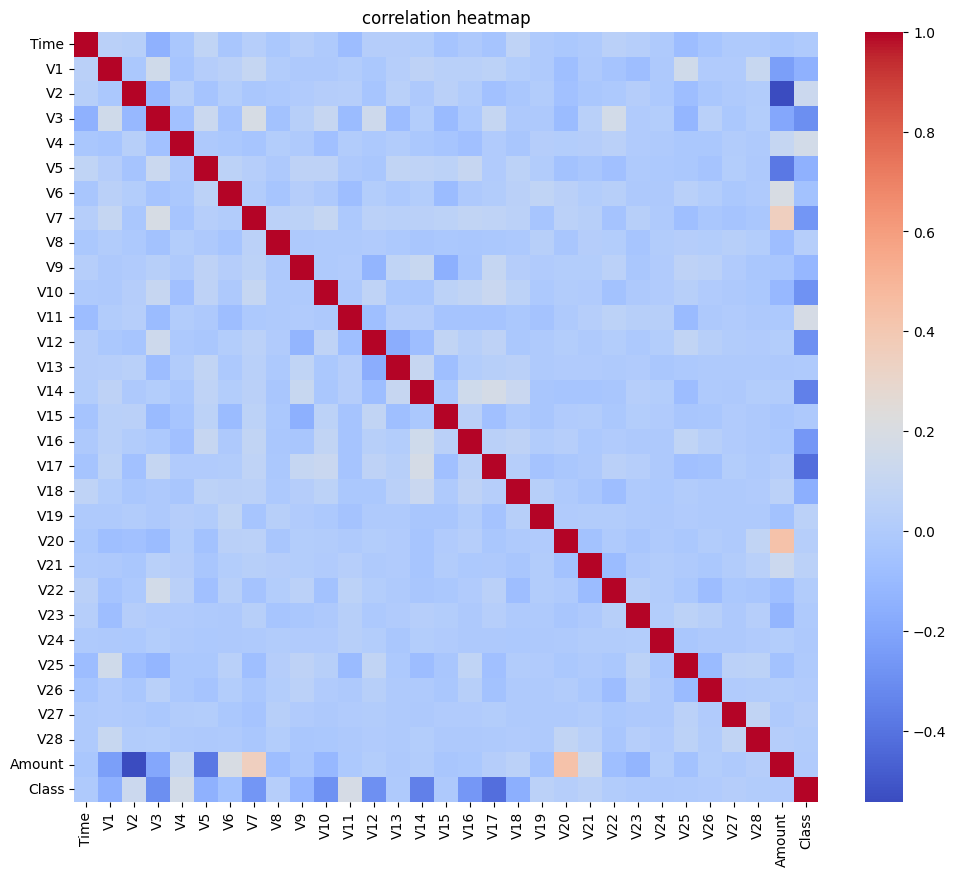

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,10))

sns.heatmap(data.corr(),annot=False,cmap='coolwarm')
plt.title('correlation heatmap')
plt.show()

In [ ]:
!pip install plotly
import plotly.graph_objects as go

labels=['V1 Low','V1 High','V2 Low','V2 High','Low amount','High amount','Genuine','Fraud']
sources=[0,1,2,3,4,5,0,2,1,3,4,6]
targets=[1,2,3,4,5,6,0,1,2,3,4,6]
values=[50,30,60,70,90,20,20,30,56,30,80]

fig=go.Figure(data=[go.Sankey(
    node=dict(
      pad=15,
      thickness=20,
      line=dict(color="Red",width=0.5),
      label=labels,
      color="blue"
    ),
    link=dict(source=sources,target=targets,value=values) # Corrected indentation
)]) # Corrected indentation
fig.show()

<function matplotlib.pyplot.show(close=None, block=None)>

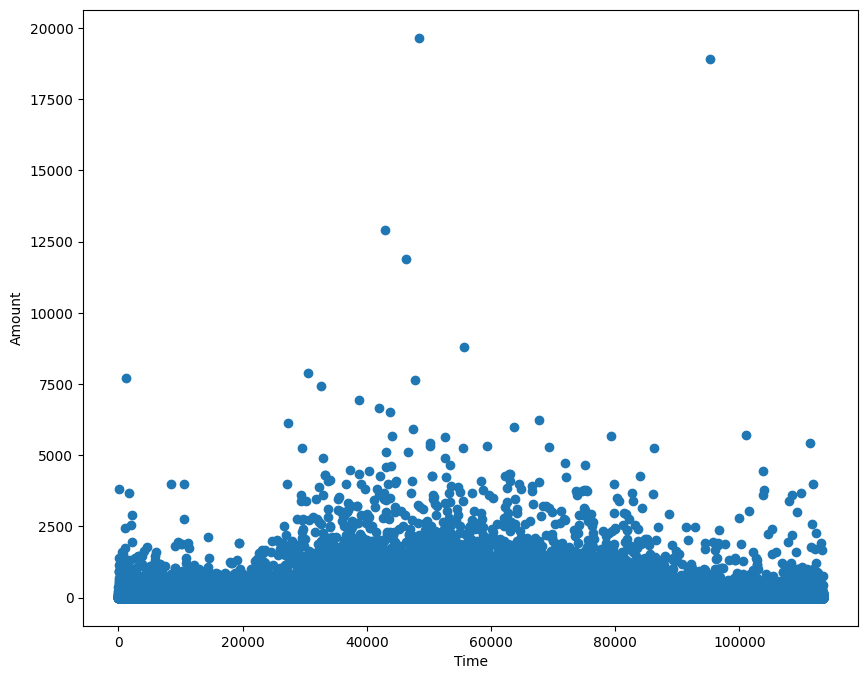

In [ ]:
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(1,1,1)
ax.scatter(data['Time'],data['Amount'])
ax.set_xlabel('Time')
ax.set_ylabel('Amount')
plt.show

In [ ]:
!pip install plotly pandas
import plotly.express as px
import pandas as pd

data['Fraud'] = data['Class'].map({0: 'Genuine', 1: 'Fraud'})


data['Amount_category'] = pd.cut(data['Amount'], bins=[-float('inf'), 100, float('inf')], labels=['Low amount', 'High amount'])  # Using -inf and inf for bins

!pip install plotly pandas
import plotly.express as px
import pandas as pd

data['Fraud'] = data['Class'].map({0: 'Genuine', 1: 'Fraud'})


data['Amount_category'] = pd.cut(data['Amount'], bins=[-float('inf'), 100, float('inf')], labels=['Low amount', 'High amount'])  # Using -inf and inf for bins


fig = px.treemap(data, path=['Fraud', 'Amount_category'], values='Amount',
                 color='Fraud', hover_data=['Amount'])
fig.show()

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:1727: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [ ]:
!pip install hvplot
import holoviews as hv
import pandas as pd
import hvplot.pandas # This import should work now
hv.extension('bokeh')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.2/161.2 kB 8.7 MB/s eta 0:00:00


In [ ]:

x=data.drop('Class',axis=1)
y=data['Class']

In [ ]:

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder


X = pd.get_dummies(data, columns=['Amount_category'], drop_first=True)

y = X['Class']
X = X.drop('Class', axis=1)

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numerical_features = X_train.select_dtypes(include=['number']).columns  # Select numerical columns
scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

In [ ]:
data['Class']=data['Class'].map({0:'Genuine',1:'Fraud'})
x=data.drop('Class',axis=1)
y=data['Class']



In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression

data = pd.read_csv('/content/creditcard.csv')


if 'Amount' not in data.columns:
    raise KeyError("The 'Amount' column is not found in the DataFrame.")


label_encoder = LabelEncoder()
data['Class'] = label_encoder.fit_transform(data['Class'])

data = pd.get_dummies(data, columns=['Amount'], drop_first=True)  # drop_first to avoid multicollinearity

y = data['Class']
x = data.drop('Class', axis=1)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

numerical_features = X_train.select_dtypes(include=['number']).columns
scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
from sklearn.ensemble import RandomForestClassifieer

RF = RandomForestClassifier()
RF.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X_train, y_train)

y_pred = RF.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print('Accuracy:',accuracy)  #99.8 percentage of this model is correct

Accuracy: 0.9982693517935809


In [ ]:
from sklearn.metrics import classification_report  # Import the classification_report function
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6334
           1       0.82      0.67      0.74        21
           2       0.00      0.00      0.00         1

    accuracy                           1.00      6356
   macro avg       0.61      0.56      0.58      6356
weighted avg       1.00      1.00      1.00      6356



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
y_pred_train = RF.predict(X_train)
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25343
           1       1.00      1.00      1.00        81

    accuracy                           1.00     25424
   macro avg       1.00      1.00      1.00     25424
weighted avg       1.00      1.00      1.00     25424



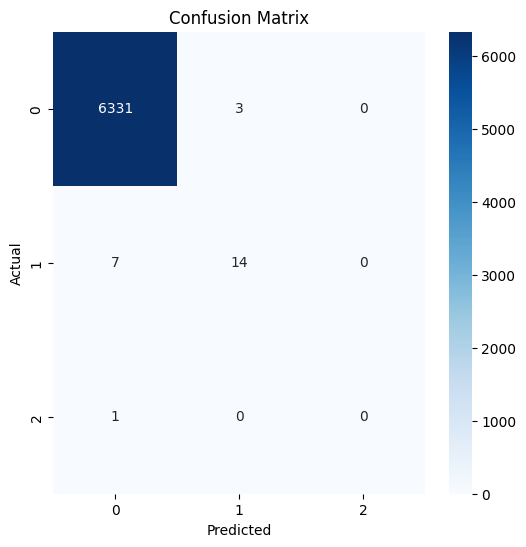

In [ ]:
import matplotlib.pyplot as plt # import the matplotlib library and assign it to the alias plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(6,6))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d',cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Text(45.722222222222214, 0.5, 'Actual')

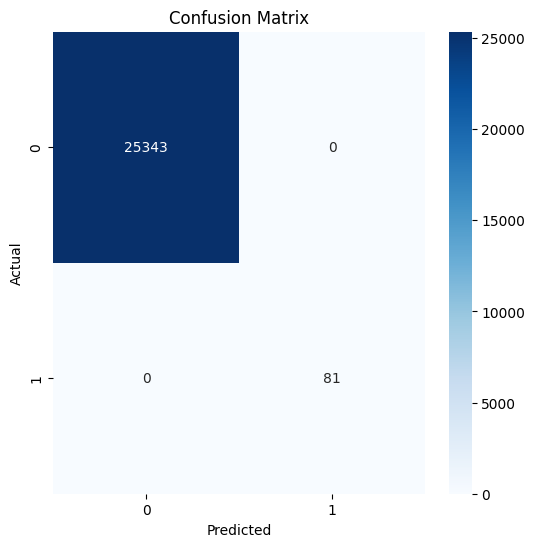

In [ ]:
plt.figure(figsize=(6,6))
sns.heatmap(confusion_matrix(y_train,y_pred_train),annot=True,fmt='d',cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')